In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)

In [3]:

print("Loading dataset...")

df = pd.read_csv("forestfire.csv")

# Select important features (as given)
X_cols = ["Temperature", "RH", "Ws", "Rain", "FFMC", "DMC", "DC", "ISI", "BUI"]
y_col = "FWI"

X = df[X_cols]
y = df[y_col]


Loading dataset...


In [4]:
print("Splitting data...")

# Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Splitting data...


In [5]:
print("Scaling features...")

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Scaling features...


In [6]:
# Save scaler for deployment
joblib.dump(scaler, "scaler.pkl")
print("Scaler saved as scaler.pkl")


Scaler saved as scaler.pkl


In [18]:
# ==========================================================
# MODULE 4: MODEL TRAINING USING RIDGE REGRESSION
# ==========================================================

alpha_values = [0.01, 0.1, 1, 5, 10, 20, 50, 100]
mse_train_list = []
mse_test_list = []
rmse_train_list = []
rmse_test_list = []
mae_train_list = []
mae_test_list = []


In [19]:
print("Training Ridge models with different alpha values...")

for alpha in alpha_values:
    model = Ridge(alpha=alpha)
    model.fit(X_train_scaled, y_train)

    # PREDICTIONS
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # TRAIN METRICS
    mse_train_list.append(mean_squared_error(y_train, y_train_pred))
    rmse_train_list.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    mae_train_list.append(mean_absolute_error(y_train, y_train_pred))

    # TEST METRICS
    mse_test_list.append(mean_squared_error(y_test, y_test_pred))
    rmse_test_list.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    mae_test_list.append(mean_absolute_error(y_test, y_test_pred))

    print(f"Alpha {alpha} → Test MSE = {mse_test_list[-1]:.4f}")

Training Ridge models with different alpha values...
Alpha 0.01 → Test MSE = 0.3605
Alpha 0.1 → Test MSE = 0.4079
Alpha 1 → Test MSE = 0.5645
Alpha 5 → Test MSE = 0.7529
Alpha 10 → Test MSE = 0.9784
Alpha 20 → Test MSE = 1.4375
Alpha 50 → Test MSE = 2.5547
Alpha 100 → Test MSE = 3.7187


In [20]:
best_index = np.argmin(mse_test_list)
best_alpha = alpha_values[best_index]

print("\nBest Alpha Found:", best_alpha)


Best Alpha Found: 0.01


In [21]:
# Train final model
best_model = Ridge(alpha=best_alpha)
best_model.fit(X_train_scaled, y_train)

,alpha,0.01
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [22]:
# Save final model
joblib.dump(best_model, "ridge.pkl")
print("Model saved as ridge.pkl")

Model saved as ridge.pkl


In [23]:
print("\nEvaluating model...")

y_pred_final = best_model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_final)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
r2 = r2_score(y_test, y_pred_final)

print("\n--- Model Performance ---")
print(f"MAE  = {mae:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"R²   = {r2:.4f}")


Evaluating model...

--- Model Performance ---
MAE  = 0.4262
RMSE = 0.6004
R²   = 0.9881


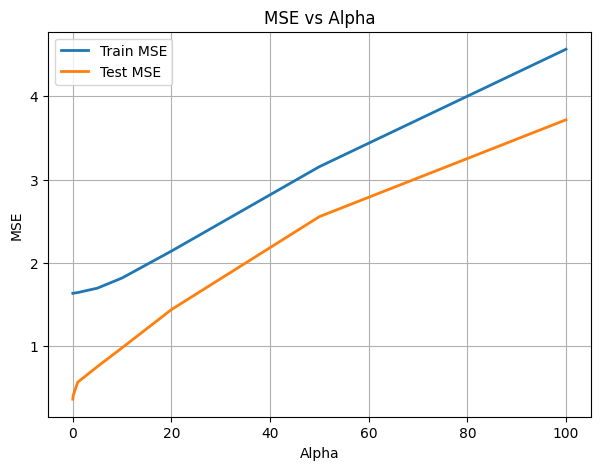

In [24]:
# --- MSE vs Alpha ---
plt.figure(figsize=(7,5))
plt.plot(alpha_values, mse_train_list, label="Train MSE", linewidth=2)
plt.plot(alpha_values, mse_test_list, label="Test MSE", linewidth=2)
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.title("MSE vs Alpha")
plt.grid(True)
plt.legend()
plt.show()

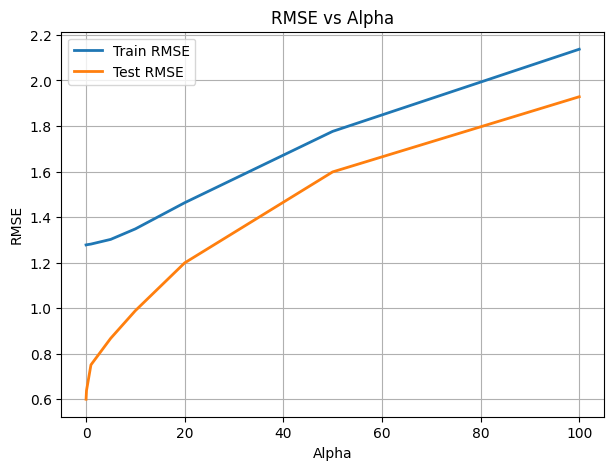

In [25]:
# --- RMSE vs Alpha ---
plt.figure(figsize=(7,5))
plt.plot(alpha_values, rmse_train_list, label="Train RMSE", linewidth=2)
plt.plot(alpha_values, rmse_test_list, label="Test RMSE", linewidth=2)
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.title("RMSE vs Alpha")
plt.grid(True)
plt.legend()
plt.show()


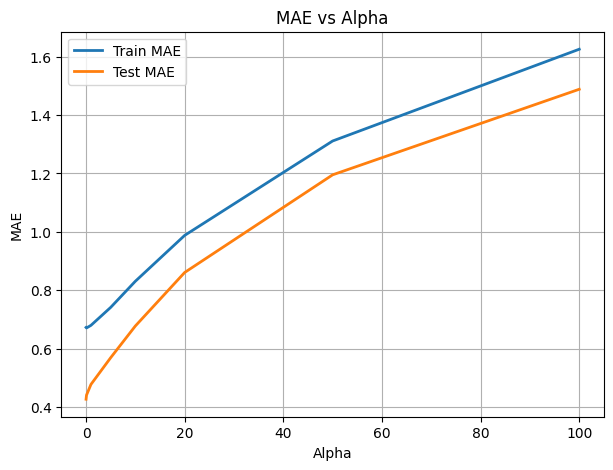

In [26]:
# --- MAE vs Alpha ---
plt.figure(figsize=(7,5))
plt.plot(alpha_values, mae_train_list, label="Train MAE", linewidth=2)
plt.plot(alpha_values, mae_test_list, label="Test MAE", linewidth=2)
plt.xlabel("Alpha")
plt.ylabel("MAE")
plt.title("MAE vs Alpha")
plt.grid(True)
plt.legend()
plt.show()

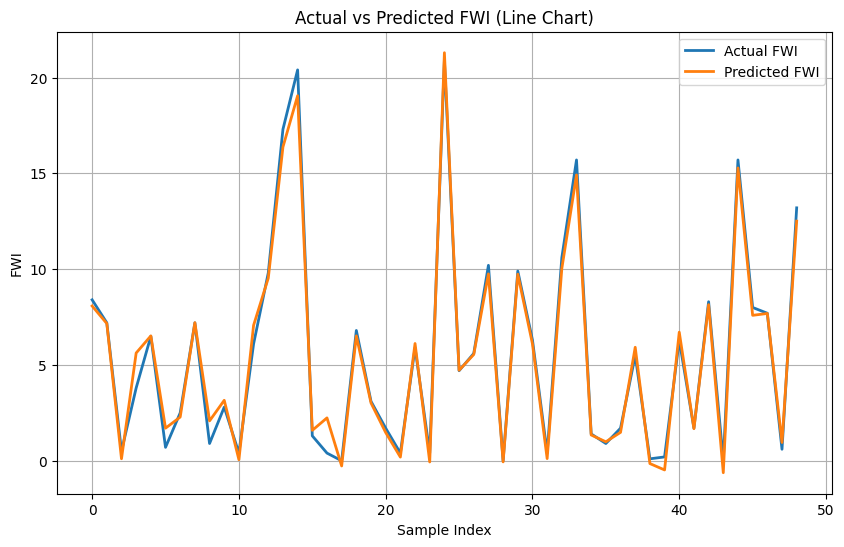


Task Completed Successfully.


In [28]:
# ==========================================================
# FINAL PREDICTED vs ACTUAL PLOT
# ==========================================================

plt.figure(figsize=(10,6))

plt.plot(range(len(y_test)), y_test.values, label="Actual FWI", linewidth=2)
plt.plot(range(len(y_pred_final)), y_pred_final, label="Predicted FWI", linewidth=2)

plt.xlabel("Sample Index")
plt.ylabel("FWI")
plt.title("Actual vs Predicted FWI (Line Chart)")
plt.legend()
plt.grid(True)

plt.show()

print("\nTask Completed Successfully.")